Notebook to analyze raw, interim, and clean datasets

# Setup

In [3]:
import sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
proj_path = "/Users/aarontrefler_temp2/Documents/My_Documents/Kaggle/kaggle-gendered-pronoun/"
sys.path.insert(0, proj_path)

In [5]:
import src.utils as utils
import src.data.data_utils as data_utils
import src.models.bert_model_utils as bert_model_utils

/Users/aarontrefler_temp2/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [6]:
%reload_ext autoreload
%autoreload 2

pd.options.display.max_columns = 20

In [7]:
bert_dir = proj_path + "bert/"
data_raw_dir = proj_path + "data/raw/"
data_interim_dir = proj_path + "data/interim/"
data_clean_dir = proj_path + "data/clean/"

# Analyze Raw Data

In [8]:
df_train = pd.read_csv(proj_path + "data/raw/gap-test.tsv", sep='\t')
df_valid = pd.read_csv(proj_path + "data/raw/gap-validation.tsv", sep='\t')
df_test = pd.read_csv(proj_path + "data/raw/gap-development.tsv", sep='\t')

In [9]:
utils.display_df(df_train, title="Train - GAP Test")
utils.display_df(df_valid, title="Validation - GAP Validation")
utils.display_df(df_test, title="Test - GAP Development")

Train - GAP Test:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner


(2000, 11)

Validation - GAP Validation:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,validation-1,He admitted making four trips to China and pla...,him,256,Jose de Venecia Jr,208,False,Abalos,241,False,http://en.wikipedia.org/wiki/Commission_on_Ele...


(454, 11)

Test - GAP Development:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...


(2000, 11)

In [10]:
print(df_train.Text[0])

Upon their acceptance into the Kontinental Hockey League, Dehner left Finland to sign a contract in Germany with EHC M*nchen of the DEL on June 18, 2014. After capturing the German championship with the M*nchen team in 2016, he left the club and was picked up by fellow DEL side EHC Wolfsburg in July 2016. Former NHLer Gary Suter and Olympic-medalist Bob Suter are Dehner's uncles. His cousin is Minnesota Wild's alternate captain Ryan Suter.


Num A Coref: 0.459
Num B Coref: 0.4275
Num Neither: 0.1135


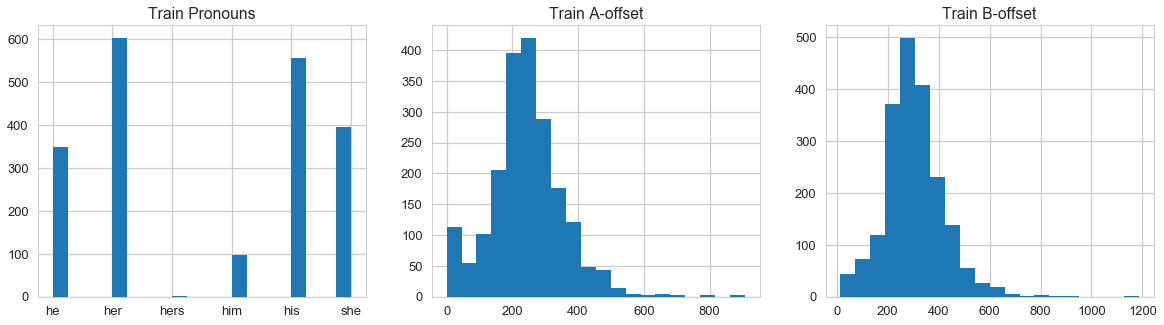

Num A Coref: 0.4118942731277533
Num B Coref: 0.45154185022026433
Num Neither: 0.13656387665198239


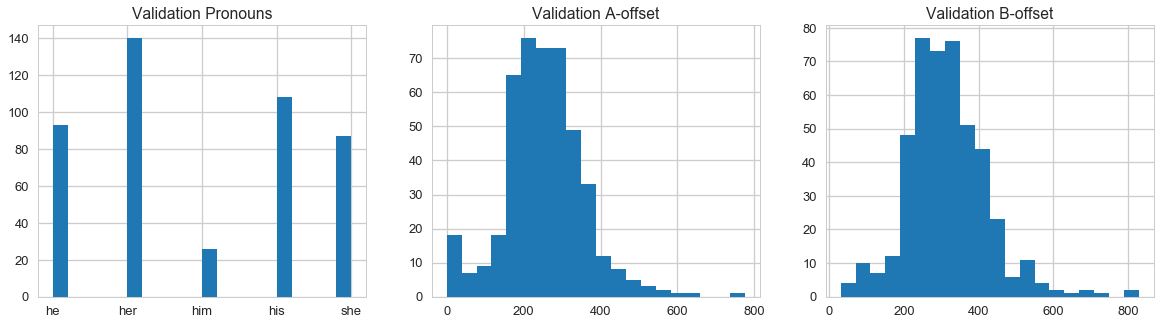

Num A Coref: 0.437
Num B Coref: 0.4625
Num Neither: 0.1005


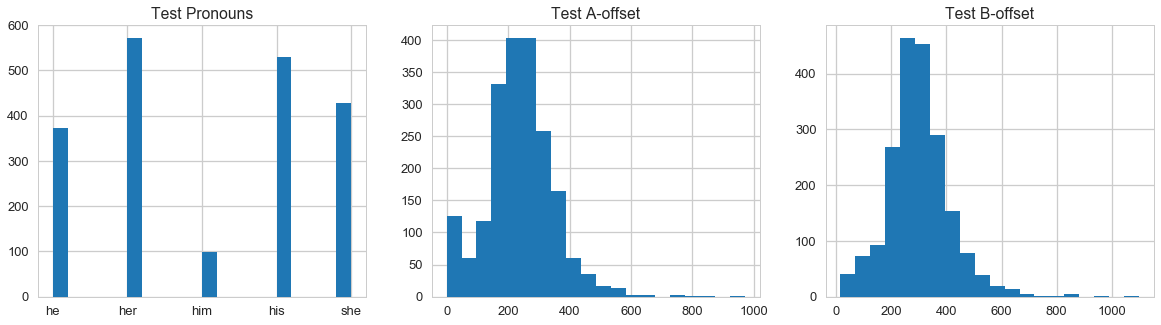

In [26]:
def describe_raw_data(df, dataset_name):
    f, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    df.Pronoun.str.lower().hist(bins=20, ax=axes[0])
    axes[0].set_title(dataset_name + " Pronouns")
    
    df['A-offset'].hist(bins=20, ax=axes[1])
    axes[1].set_title(dataset_name + " A-offset")
    
    df['B-offset'].hist(bins=20, ax=axes[2])
    axes[2].set_title(dataset_name + " B-offset")
    
    n = len(df)
    num_A = np.sum(df['A-coref'])
    num_B = np.sum(df['B-coref'])
    print("Num A Coref: {num}".format(num=(num_A) / n))
    print("Num B Coref: {num}".format(num=(num_B) / n))
    print("Num Neither: {num}".format(num=(n - num_A - num_B) / n))
    
    plt.show()
    

describe_raw_data(df_train, "Train")
describe_raw_data(df_valid, "Validation")
describe_raw_data(df_test, "Test")

# Analyze Interim Data

In [21]:
df_train_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_train.json", orient = 'columns')
df_valid_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_valid.json", orient = 'columns')
df_test_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_test.json", orient = 'columns')

In [22]:
utils.display_df(df_train_emb, title="Train - GAP Test")
utils.display_df(df_valid_emb, title="Validation - GAP Validation")
utils.display_df(df_test_emb, title="Test - GAP Development")

Train - GAP Test:


,emb_A,emb_B,emb_P,label
0,"[-0.145264, -0.3619263333, 0.526743, 0.0362323...","[-0.47775049999999997, -0.598545, 0.4266439999...","[-0.551684, -0.023438, -0.549022, -0.159332, 0...",B


(2000, 4)

Validation - GAP Validation:


,emb_A,emb_B,emb_P,label
0,"[0.0228178333, -0.4209143333, 0.7820245, 0.232...","[-0.3670055, -0.4148985, 0.5928515, 0.31750449...","[-0.123571, -0.16237000000000001, 0.040803, -0...",Neither


(454, 4)

Test - GAP Development:


,emb_A,emb_B,emb_P,label
0,"[0.7388775, -0.2271645, 0.1093035, -0.527125, ...","[0.385269, 0.024027999999999997, 0.90755000000...","[-0.008841, -0.9525579999999999, 0.113496, -0....",A


(2000, 4)

In [23]:
# Read in and parse BERT word embedding json files
X_train, Y_train = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_train.json"))
X_valid, Y_valid = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_valid.json"))
X_test, Y_test = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_test.json"))

Number of examples with missing values: 1


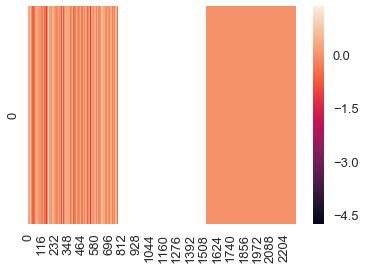

Number of examples with missing values: 0
Number of examples with missing values: 2


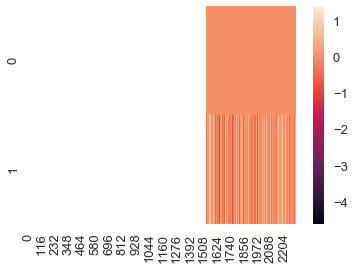

In [24]:
def describe_missing_values(X):
    nan_rows = [row for row in range(len(X)) if np.isnan(X[row]).sum()]
    
    print("Number of examples with missing values: {num}".format(num=len(nan_rows)))
    if len(nan_rows) > 0:
        sns.heatmap(X[nan_rows])
        plt.show()


describe_missing_values(X_train)
describe_missing_values(X_valid)
describe_missing_values(X_test)

# Analyze Clean Data

In [30]:
X_train_clean = np.genfromtxt(data_clean_dir + "X_train.csv", delimiter=",")
X_valid_clean = np.genfromtxt(data_clean_dir + "X_valid.csv", delimiter=",")
X_test_clean = np.genfromtxt(data_clean_dir + "X_test.csv", delimiter=",")

Y_train_clean = np.genfromtxt(data_clean_dir + "Y_train.csv", delimiter=",")
Y_valid_clean = np.genfromtxt(data_clean_dir + "Y_valid.csv", delimiter=",")
Y_test_clean = np.genfromtxt(data_clean_dir + "Y_test.csv", delimiter=",")

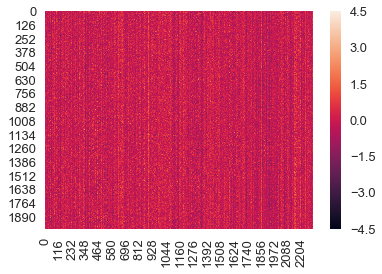

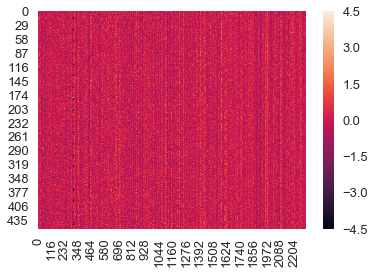

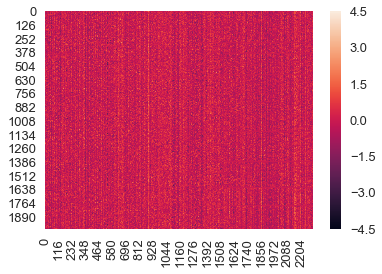

In [31]:
def visualize_data(X):
    sns.heatmap(X, vmin=-4.5, vmax=4.5)
    plt.show()

    
visualize_data(X_train_clean)
visualize_data(X_valid_clean)
visualize_data(X_test_clean)